In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()


# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Print the shape of the data
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")


x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [2]:
class Autoencoder(tf.keras.Model):
    def __init__(self, latent_dim, input_shape, activation='relu', dropout_rate=0.1):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.input_shape = input_shape

        # Encoder
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=input_shape),
            layers.Conv2D(32, (3, 3), activation=activation, padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2), padding='same'),
            layers.Conv2D(64, (3, 3), activation=activation, padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2), padding='same'),
            layers.Conv2D(128, (3, 3), activation=activation, padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2), padding='same'),
            layers.Flatten(),
            layers.Dense(latent_dim, activation=activation),
            layers.Dropout(dropout_rate)
        ])

        # Decoder
        self.decoder = tf.keras.Sequential([
            layers.Dense(4 * 4 * 128, activation=activation),
            layers.Reshape((4, 4, 128)),
            layers.Conv2DTranspose(128, (3, 3), activation=activation, padding='same'),
            layers.BatchNormalization(),
            layers.UpSampling2D((2, 2)),
            layers.Conv2DTranspose(64, (3, 3), activation=activation, padding='same'),
            layers.BatchNormalization(),
            layers.UpSampling2D((2, 2)),
            layers.Conv2DTranspose(32, (3, 3), activation=activation, padding='same'),
            layers.BatchNormalization(),
            layers.UpSampling2D((2, 2)),
            layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Instantiate the autoencoder
input_shape = (32, 32, 3)
latent_dim = 64  # Adjusted latent dimension size
dropout_rate = 0.5  # Adjusted dropout rate

autoencoder = Autoencoder(latent_dim, input_shape, dropout_rate=dropout_rate)

# Compile the autoencoder with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')
autoencoder.build(input_shape=(None, *input_shape))
autoencoder.summary()


C:\Users\abdul\anaconda3\Lib\site-packages\keras\src\layers\layer.py:361: UserWarning: `build()` was called on layer 'autoencoder', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │         225,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,280 (880.00 KB)

 Trainable params: 224,832 (878.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [4]:
# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=64,
                          shuffle=True,
                          validation_data=(x_test, x_test))


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - loss: 0.5738 - val_loss: 0.5753
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - loss: 0.5744 - val_loss: 0.5753
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - loss: 0.5738 - val_loss: 0.5750
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - loss: 0.5736 - val_loss: 0.5749
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - loss: 0.5731 - val_loss: 0.5750
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - loss: 0.5735 - val_loss: 0.5751
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - loss: 0.5736 - val_loss: 0.5750
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - loss: 0.5729 - val_loss: 0.5751
Epoch 9/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - loss: 0.5737 - val_loss: 0.5750
Epoch 10/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - loss: 0.5733 - val_loss: 0.5749
Epoch 11/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - loss: 0.5734 - val_loss: 0.5747
Epoch 12/50
782/782 ━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.5740
Test loss: 0.5739110112190247
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


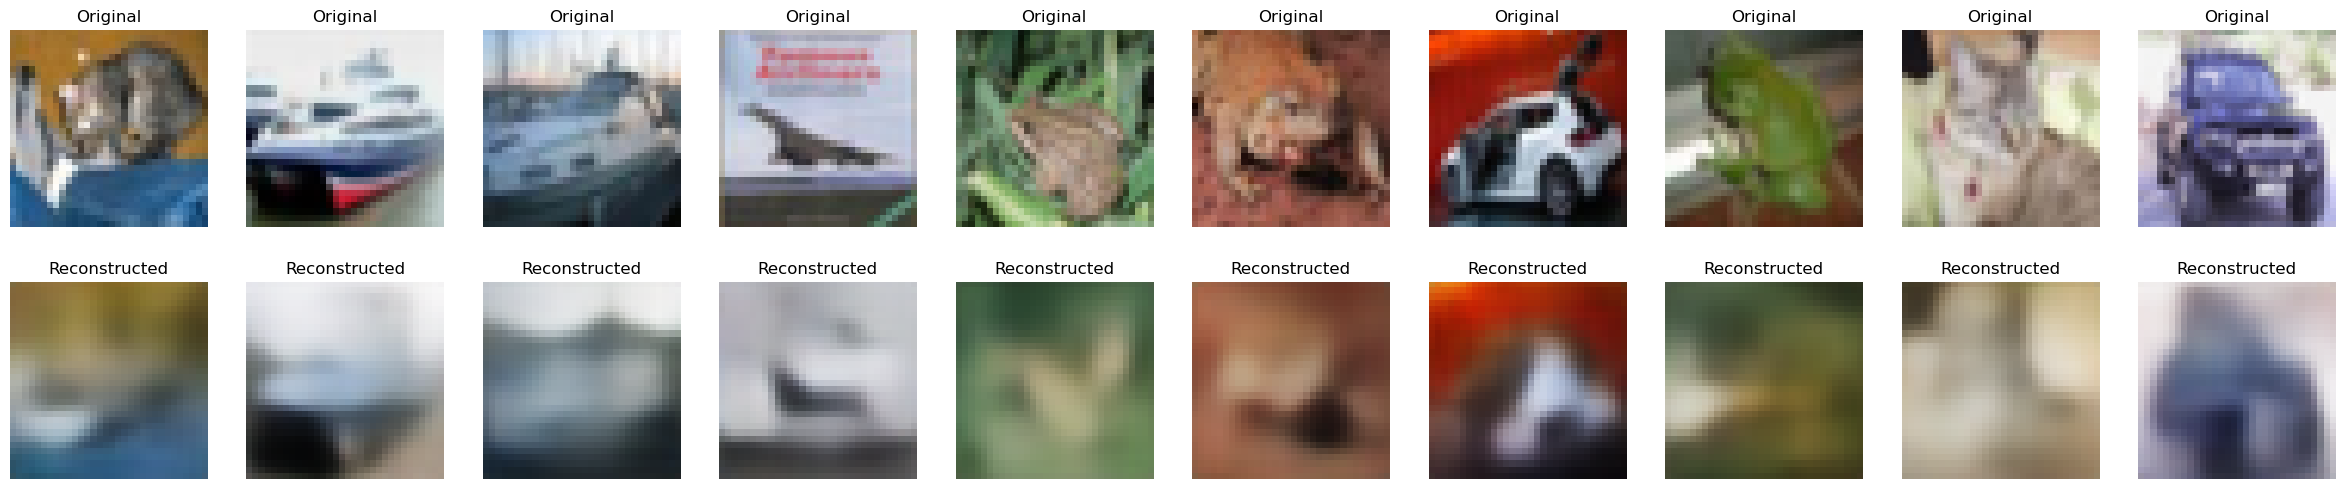

In [5]:
# Evaluate the autoencoder
loss = autoencoder.evaluate(x_test, x_test)
print(f"Test loss: {loss}")

# Visualize original and reconstructed images
def plot_original_vs_reconstructed(x_test, autoencoder, n=10):
    reconstructed = autoencoder.predict(x_test[:n])
    plt.figure(figsize=(30, 6))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i])
        plt.title("Original")
        plt.axis("off")
        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i])
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()

plot_original_vs_reconstructed(x_test, autoencoder)
